## Evaluation Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from pydataset import data

1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = data('tips')

In [3]:
# what does it look like?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [4]:
# create a target variable
# target = 'tip'
df = df.drop(columns=['sex', 'smoker', 'day', 'time', 'size'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
dtypes: float64(2)
memory usage: 5.7 KB


In [5]:
# create a baseline model
df['yhat_baseline'] = df['tip'].mean()

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
- Here is some sample code to get you started:

In [6]:
# from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
# model = LinearRegression().fit(X, y)
# predictions = model.predict(X)

In [7]:
# create and fit our LinearRegression model
model = LinearRegression().fit(df[['total_bill']], df['tip'])
df['yhat'] = model.predict(df[['total_bill']])

In [8]:
# did we add the appropriate columns?
df.head()

,total_bill,tip,yhat_baseline,yhat
1,16.99,1.01,2.998279,2.704636
2,10.34,1.66,2.998279,2.006223
3,21.01,3.50,2.998279,3.126835
4,23.68,3.31,2.998279,3.407250
5,24.59,3.61,2.998279,3.502822


3. Plot the residuals for the linear regression model that you made.

In [9]:
# create the residulas column by subtracting predicted tip from actual tip
df['residuals'] = df['tip'] - df['yhat']

<AxesSubplot:ylabel='Frequency'>

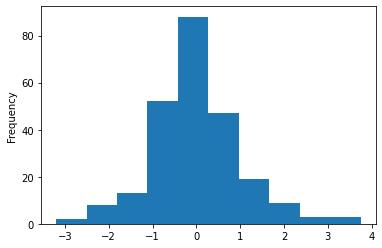

In [10]:
df['residuals'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

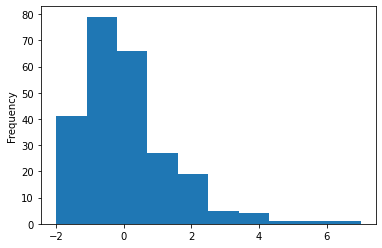

In [11]:
# what would the baseline residuals look like?
df['baseline_residuals'] = df['tip'] - df['yhat_baseline']
df['baseline_residuals'].plot.hist()

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
# set an n value for number of observations
n = df.shape[0]

In [13]:
# sum of squared errors
sse = (df['residuals'] ** 2).sum()
sse

252.788743850776

In [14]:
# explained sum of squares
ess = ((df['yhat'] - df['tip'].mean())**2).sum()
ess

212.4237331984042

In [15]:
# total sum of squares
tss = ((df['tip'] - df['tip'].mean())**2).sum()
tss

465.2124770491804

In [16]:
# mean squared error
mse = sse / n
mse

1.036019442011377

In [17]:
# root mean squared error
rmse = math.sqrt(mse)
rmse

1.0178504025697377

In [18]:
# r^2 score

r_sq = ess / tss
r_sq

0.45661658635167607

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [19]:
# baseline sse
sse_baseline = (df['baseline_residuals'] ** 2).sum()
mse_baseline = sse_baseline / n
rmse_baseline = math.sqrt(mse_baseline)

print(f'''
Baseline:

sse:    {sse_baseline}
mse:    {mse_baseline}
rmse:   {rmse_baseline}
''')


Baseline:

sse:    465.2124770491804
mse:    1.906608512496641
rmse:   1.3807999538298954



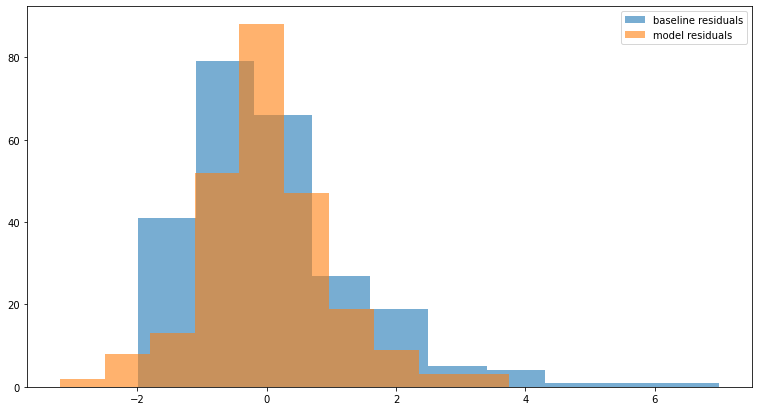

In [20]:
# so what does this all look like?

fig, ax = plt.subplots(figsize=(13,7))

ax.hist(df['baseline_residuals'], label='baseline residuals', alpha=.6)
ax.hist(df['residuals'], label='model residuals', alpha=.6)
ax.legend()

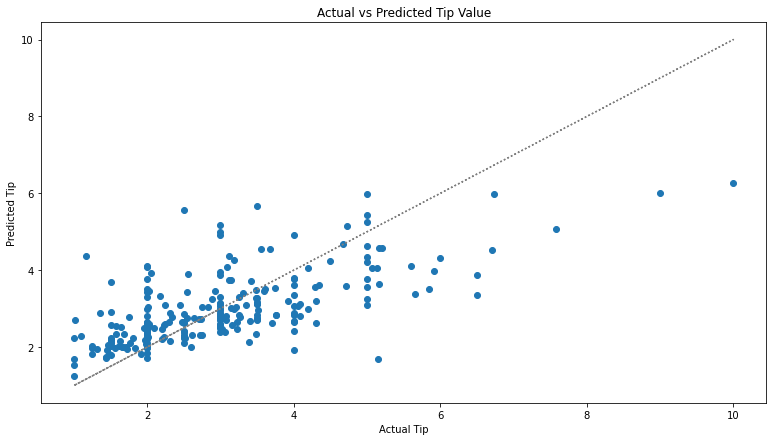

In [21]:
# let's look at actual vs predicted tips

fig, ax = plt.subplots(figsize=(13,7))
ax.scatter(df['tip'], df['yhat'], label='predicted')
ax.set(title='Actual vs Predicted Tip Value', ylabel='Predicted Tip', xlabel='Actual Tip')
ax.plot(df['tip'], df['tip'], ls=':', c='gray')

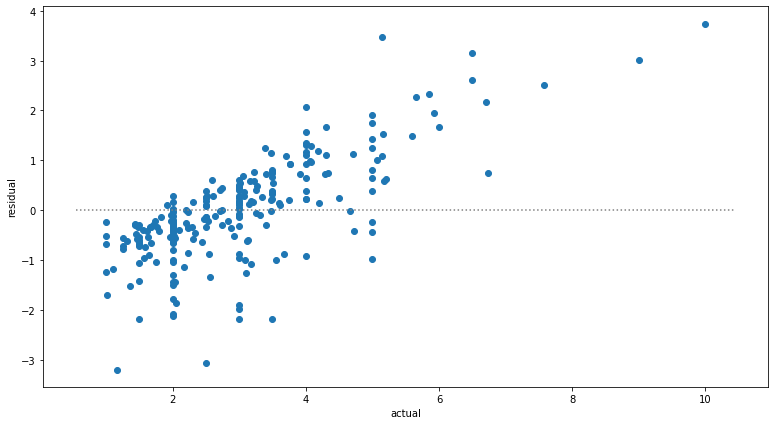

In [24]:
# now let's look at residuals...
fig, ax = plt.subplots(figsize=(13,7))

ax.scatter(df['tip'], df['residuals'])
ax.set(ylabel='residual', xlabel='actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [ ]:
cont_vars = ['total_bill']
cat_vars = ['sex', 'smoker', 'day', 'time', 'size']
target = ['tip']
variables = ['total_bill']

In [ ]:
def sse_comp(df, variables, target):
    
    return df

In [ ]:
sse_comp(df, [''])

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.